<a href="https://colab.research.google.com/github/gmrdns03/DataAnalysis_Python_Minkyo/blob/main/%5B%EB%AA%A8%EB%91%90%EC%9D%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%5D%20%EC%9D%B8%EA%B5%AC%EA%B5%AC%EC%A1%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%B0%8F%20%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0/Unit14_Numpy%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%82%98%EB%A7%8C%EC%9D%98_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) 관심있는 데이터 찾기

2) 데이터 살펴보며 질문하기

3) 질문을 정확한 문제로 정의하기

4) 알고리즘 설계하기

5) 알고리즘을 코드로 표현하기(Numpy 활용)

## 문제정의

전국에서 신도림동의 연령별 인구구조와 가장형태가 비슷한 지역은 어디일까?

### <알고리즘 설계> <br>
1. 데이터를 읽어온다.
2. 궁금한 지역의 이름을 입력 받는다.
3. 궁금한 지역의 인구 구조를 저장한다.
4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.
5. 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화 한다.


### 1. 데이터를 읽어온다.

In [4]:
import csv

f = open('/content/age2019_02_noComa_cgName.csv', 'r', encoding='cp949') # 인코딩이 utf-8이라면 생략 가능
data = csv.reader(f)
header_01 = next(data)

for row in data :
  print(row)

['서울특별시  (1100000000)', '9770638', '9770638', '53738', '59599', '65815', '70726', '70037', '69000', '76377', '73745', '75639', '70189', '74217', '80273', '74774', '71529', '78329', '82561', '82083', '90416', '107254', '109552', '114315', '122473', '129497', '141673', '150625', '156258', '165662', '165771', '152776', '151006', '150177', '144503', '144300', '145260', '142644', '157624', '164934', '168159', '162843', '162014', '141538', '145260', '144326', '146145', '158029', '165333', '168391', '176426', '175457', '169300', '167962', '154449', '147478', '149781', '151916', '141921', '152687', '159184', '167176', '157349', '145519', '142867', '132352', '135608', '123861', '103339', '110202', '83062', '85623', '88133', '85983', '86008', '79560', '60652', '63418', '59401', '72043', '60979', '49561', '47432', '42445', '37293', '33253', '29705', '25250', '20503', '17751', '14506', '12100', '10729', '8923', '7199', '5374', '3972', '2927', '2813', '2260', '1565', '1180', '880', '5932']
['서울특별시 

## 2. 궁금한 지역의 이름을 입력받는다.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import csv

f = open('/content/age2019_02_noComa.csv', 'r', encoding='cp949') # 인코딩이 utf-8이라면 생략 가능
data = csv.reader(f)
header_01 = next(data)

home = []  # 입력받은 지역의 데이터를 저장할 리스트
name = input('인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  ')

for row in data :
  if name in row[0] :
    for i in row[3:] :
      home.append(int(i))
  
print(home)

인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  신도림동
[326, 334, 406, 413, 389, 408, 417, 434, 411, 387, 420, 383, 354, 357, 340, 338, 349, 339, 407, 380, 390, 453, 424, 516, 451, 466, 448, 484, 471, 476, 558, 541, 579, 619, 638, 740, 756, 792, 745, 789, 671, 687, 700, 636, 726, 691, 657, 619, 649, 585, 579, 470, 522, 534, 563, 445, 511, 569, 572, 513, 532, 456, 426, 497, 379, 384, 399, 279, 289, 276, 268, 271, 223, 170, 150, 154, 177, 140, 126, 114, 121, 97, 86, 80, 59, 48, 44, 43, 28, 29, 22, 15, 13, 12, 5, 8, 5, 4, 2, 3, 7]


## 3. 궁금한 지역의 인구구조를 저장한다.

인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  신도림동


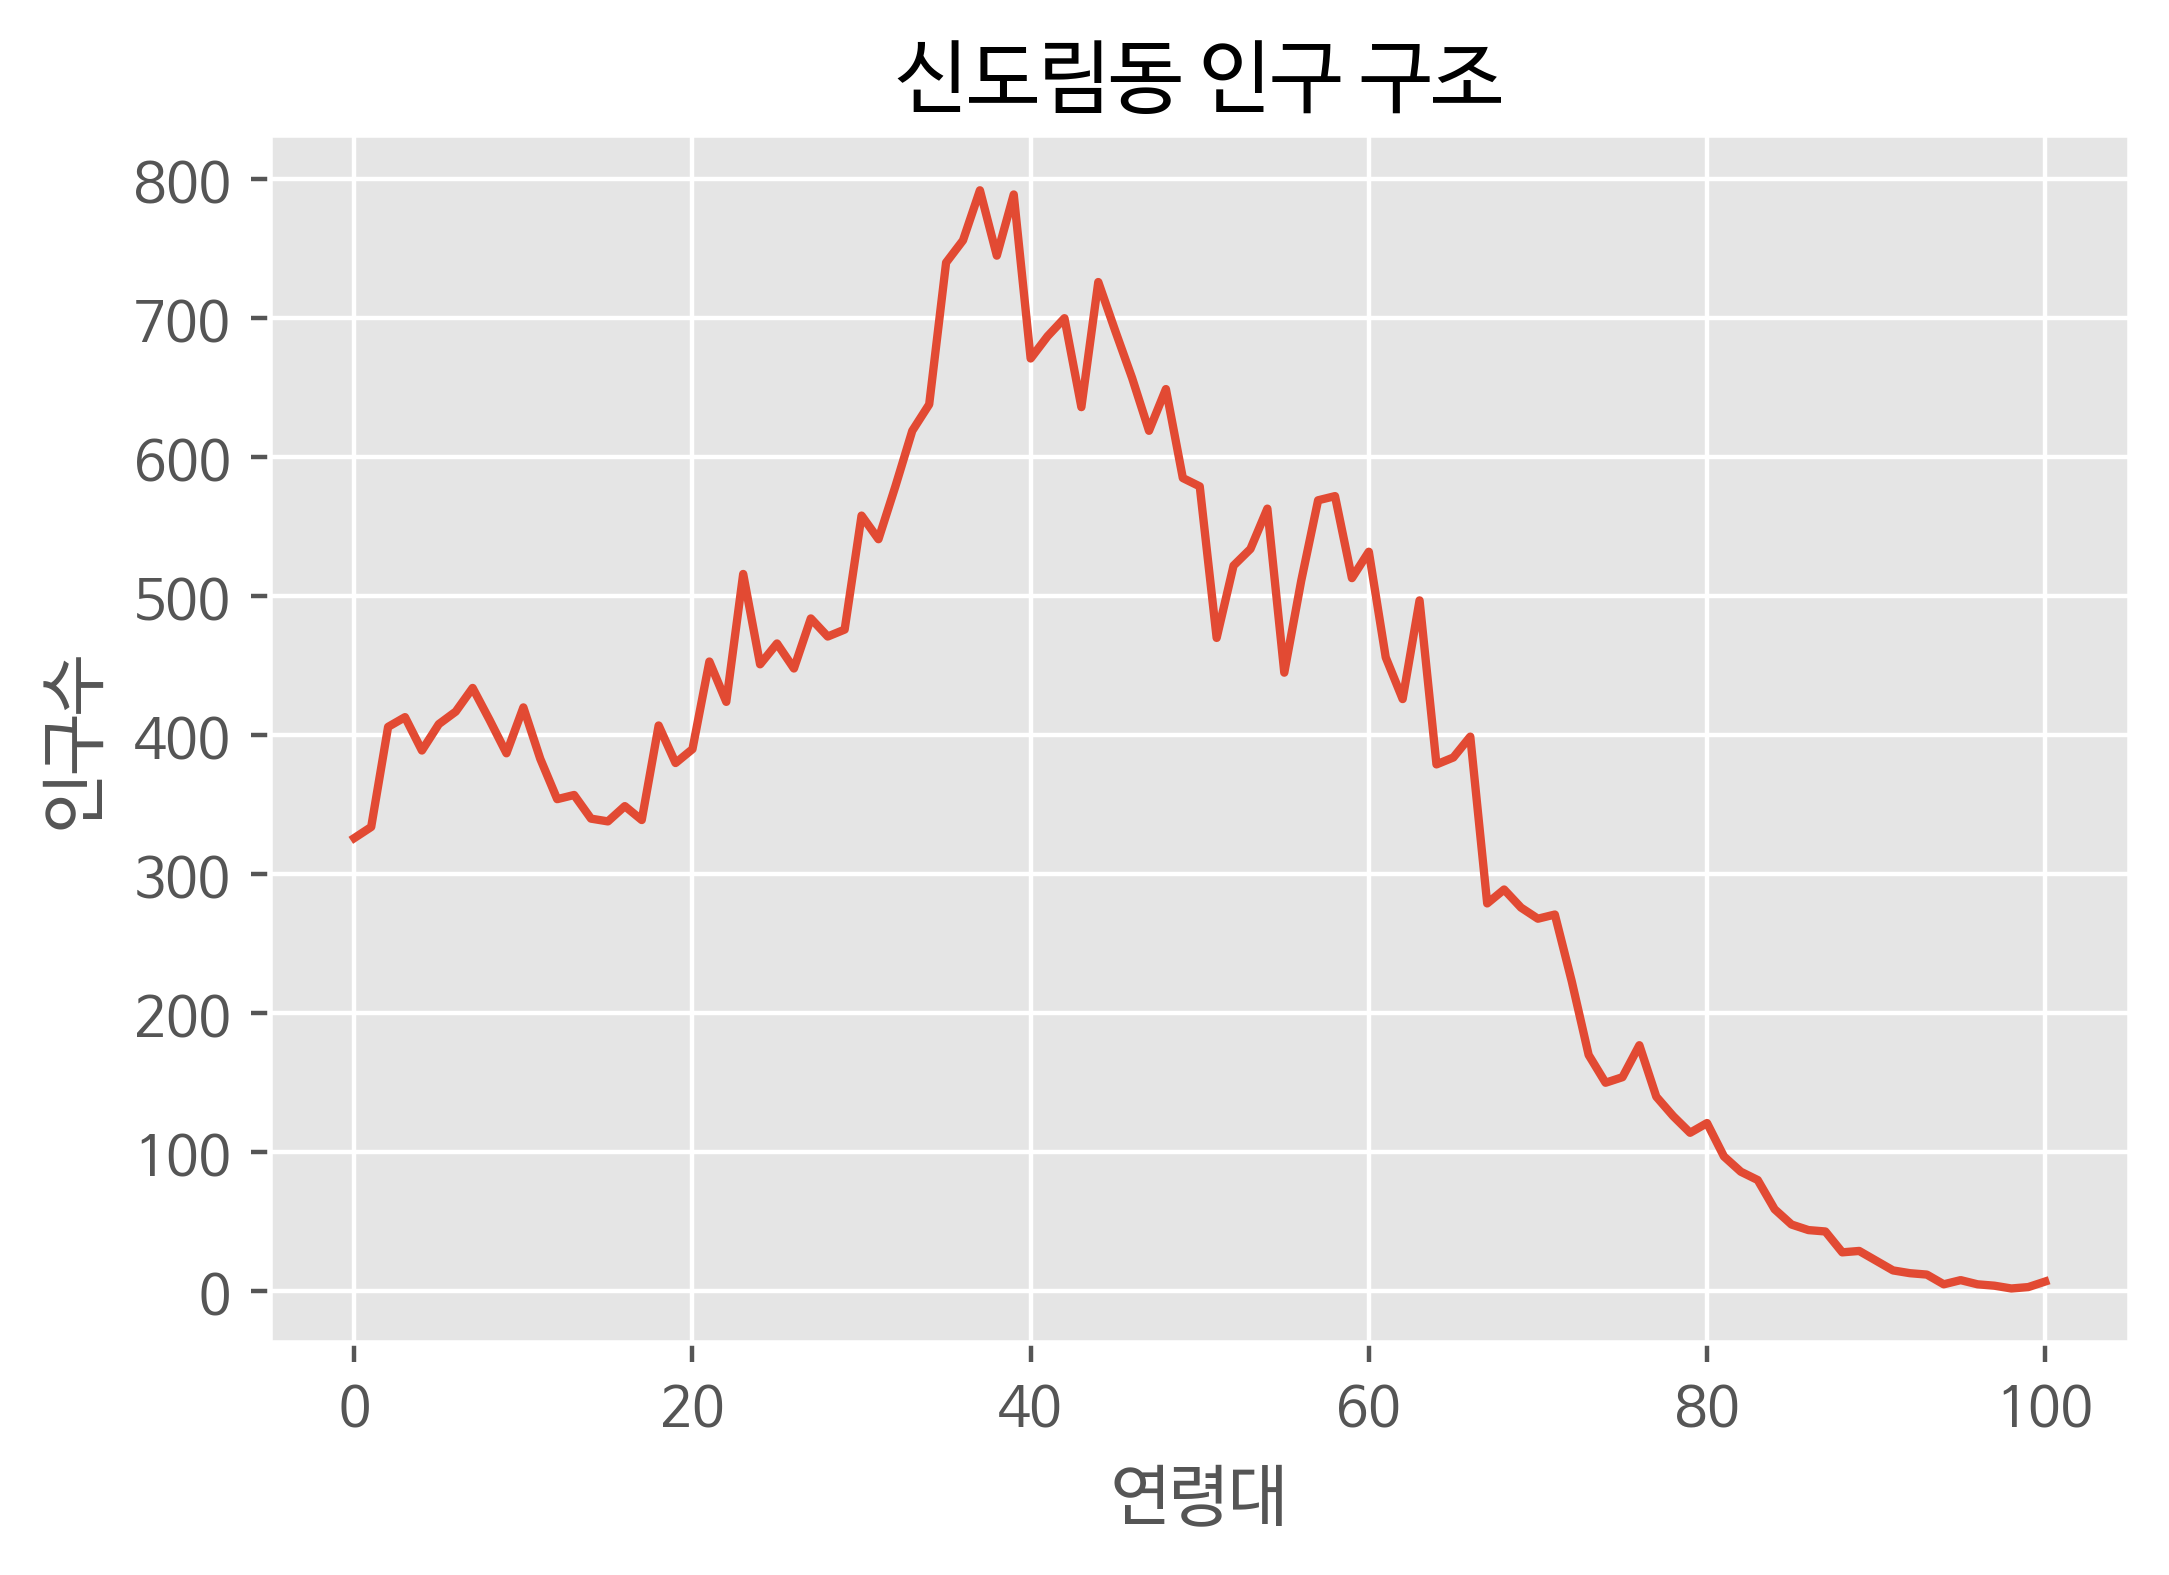

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('/content/age2019_02_noComa.csv', 'r', encoding='cp949') # 인코딩이 utf-8이라면 생략 가능
data = csv.reader(f)
header_01 = next(data)

name = input('인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  ')

for row in data :
  if name in row[0] :
    home = np.array(row[3:], dtype = int)  # Numpy 배열로 저장할 때 데이터 타입 int로 변환

# 데이터 시각화하기
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')
plt.figure(dpi = 200)

plt.title(name+' 인구 구조')
plt.plot(home)
# plt.legend()
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.show()

## 4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.


*   전국의 모든 지역 중 한곳 (B)을 선택 한다.
*   궁금한 지역 A의 0세 인구수에서 B의 0세 인구수를 뺀다
*   100세 이상 인구수에 해당 하는 값까지 반복한 후 각각의 차이를 모두 더한다.
*   전국의 모든 지역에 대해 반복하며, 그 차이가 가장 작은 지역을 찾는다.


### 궁금한 지역 A의 0세 인구비율에서 B의 0세 인구 비율을 뺀다.

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('/content/age2019_02_noComa_cgName.csv', 'r', encoding='cp949') # 인코딩이 utf-8이라면 생략 가능
data = csv.reader(f)
header_01 = next(data)

data = list(data)  # 원본 데이터를 리스트의 형태로 담아버렸다.
name = input('인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  ')

for row in data :
  if name in row[0] :
    home = np.array(row[3:], dtype = int) / int(row[2]) # Numpy를 활용해서 배열과 배열간의 연산이 가능 -> 비율을 구한다.

print(home)

인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  신도림동
[8.74745090e-03 8.96211227e-03 1.08940646e-02 1.10818933e-02
 1.04379092e-02 1.09477300e-02 1.11892240e-02 1.16453794e-02
 1.10282280e-02 1.03842439e-02 1.12697220e-02 1.02769132e-02
 9.49876570e-03 9.57926371e-03 9.12310830e-03 9.06944295e-03
 9.36460234e-03 9.09627563e-03 1.09208973e-02 1.01964152e-02
 1.04647419e-02 1.21552002e-02 1.13770527e-02 1.38456585e-02
 1.21015348e-02 1.25040249e-02 1.20210368e-02 1.29870130e-02
 1.26381883e-02 1.27723516e-02 1.49726307e-02 1.45164753e-02
 1.55361168e-02 1.66094236e-02 1.71192444e-02 1.98561769e-02
 2.02854996e-02 2.12514758e-02 1.99903402e-02 2.11709778e-02
 1.80047226e-02 1.84340453e-02 1.87828700e-02 1.70655790e-02
 1.94805195e-02 1.85413760e-02 1.76290651e-02 1.66094236e-02
 1.74144038e-02 1.56971128e-02 1.55361168e-02 1.26113556e-02
 1.40066545e-02 1.43286466e-02 1.51067940e-02 1.19405388e-02
 1.37114951e-02 1.52677901e-02 1.53482881e-02 1.37651605e-02
 1.42749812e-02 1.22356982e-02 1.14307180e

In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('/content/age2019_02_noComa_cgName.csv', 'r', encoding='cp949') # 인코딩이 utf-8이라면 생략 가능
data = csv.reader(f)
header_01 = next(data)

data = list(data)  # 원본 데이터를 리스트의 형태로 담아버렸다.
name = input('인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  ')

for row in data :
  if name in row[0] :
    home = np.array(row[3:], dtype = int) / int(row[2]) # Numpy를 활용해서 배열과 배열간의 연산이 가능 -> 비율을 구한다.

for row in data :
    array = np.array(row[3:], dtype = int) / int(row[2])
    print(np.sum(home-array))  # numpy.sum() 함수를 이용하여 각각의 차이 모두 더함


인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  신도림동
5.9631119486702744e-18
1.2793585635328952e-17
1.2576745200831851e-17
5.421010862427522e-18
6.938893903907228e-18
-9.432558900623889e-18
3.2959746043559335e-17
-6.071532165918825e-18
1.3010426069826053e-18
-2.8406096919120216e-17
3.469446951953614e-18
1.3444106938820255e-17
4.553649124439119e-18
3.2526065174565133e-18
4.7704895589362195e-18
-8.456776945386935e-18
-2.8189256484623115e-18
1.0842021724855044e-17
-1.3010426069826053e-18
1.951563910473908e-18
-1.474514954580286e-17
8.673617379884035e-18
9.107298248878237e-18
9.107298248878237e-18
-6.505213034913027e-19
1.3010426069826053e-18
3.2959746043559335e-17
-1.5612511283791264e-17
-2.1358782797964437e-17
-3.903127820947816e-18
-2.8731357570865868e-18
3.469446951953614e-18
-3.903127820947816e-18
1.2902005852577503e-17
-8.673617379884035e-18
5.854691731421724e-18
-4.9873299934333204e-18
-1.3660947373317356e-17
1.1275702593849246e-17
-5.421010862427522e-18
-3.686287386450715e-18
6.50521303491302

### 전국의 모든 지역에 반복하여 그 차이가 가장 작은 지역 찾고 시각화

인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  신도림동


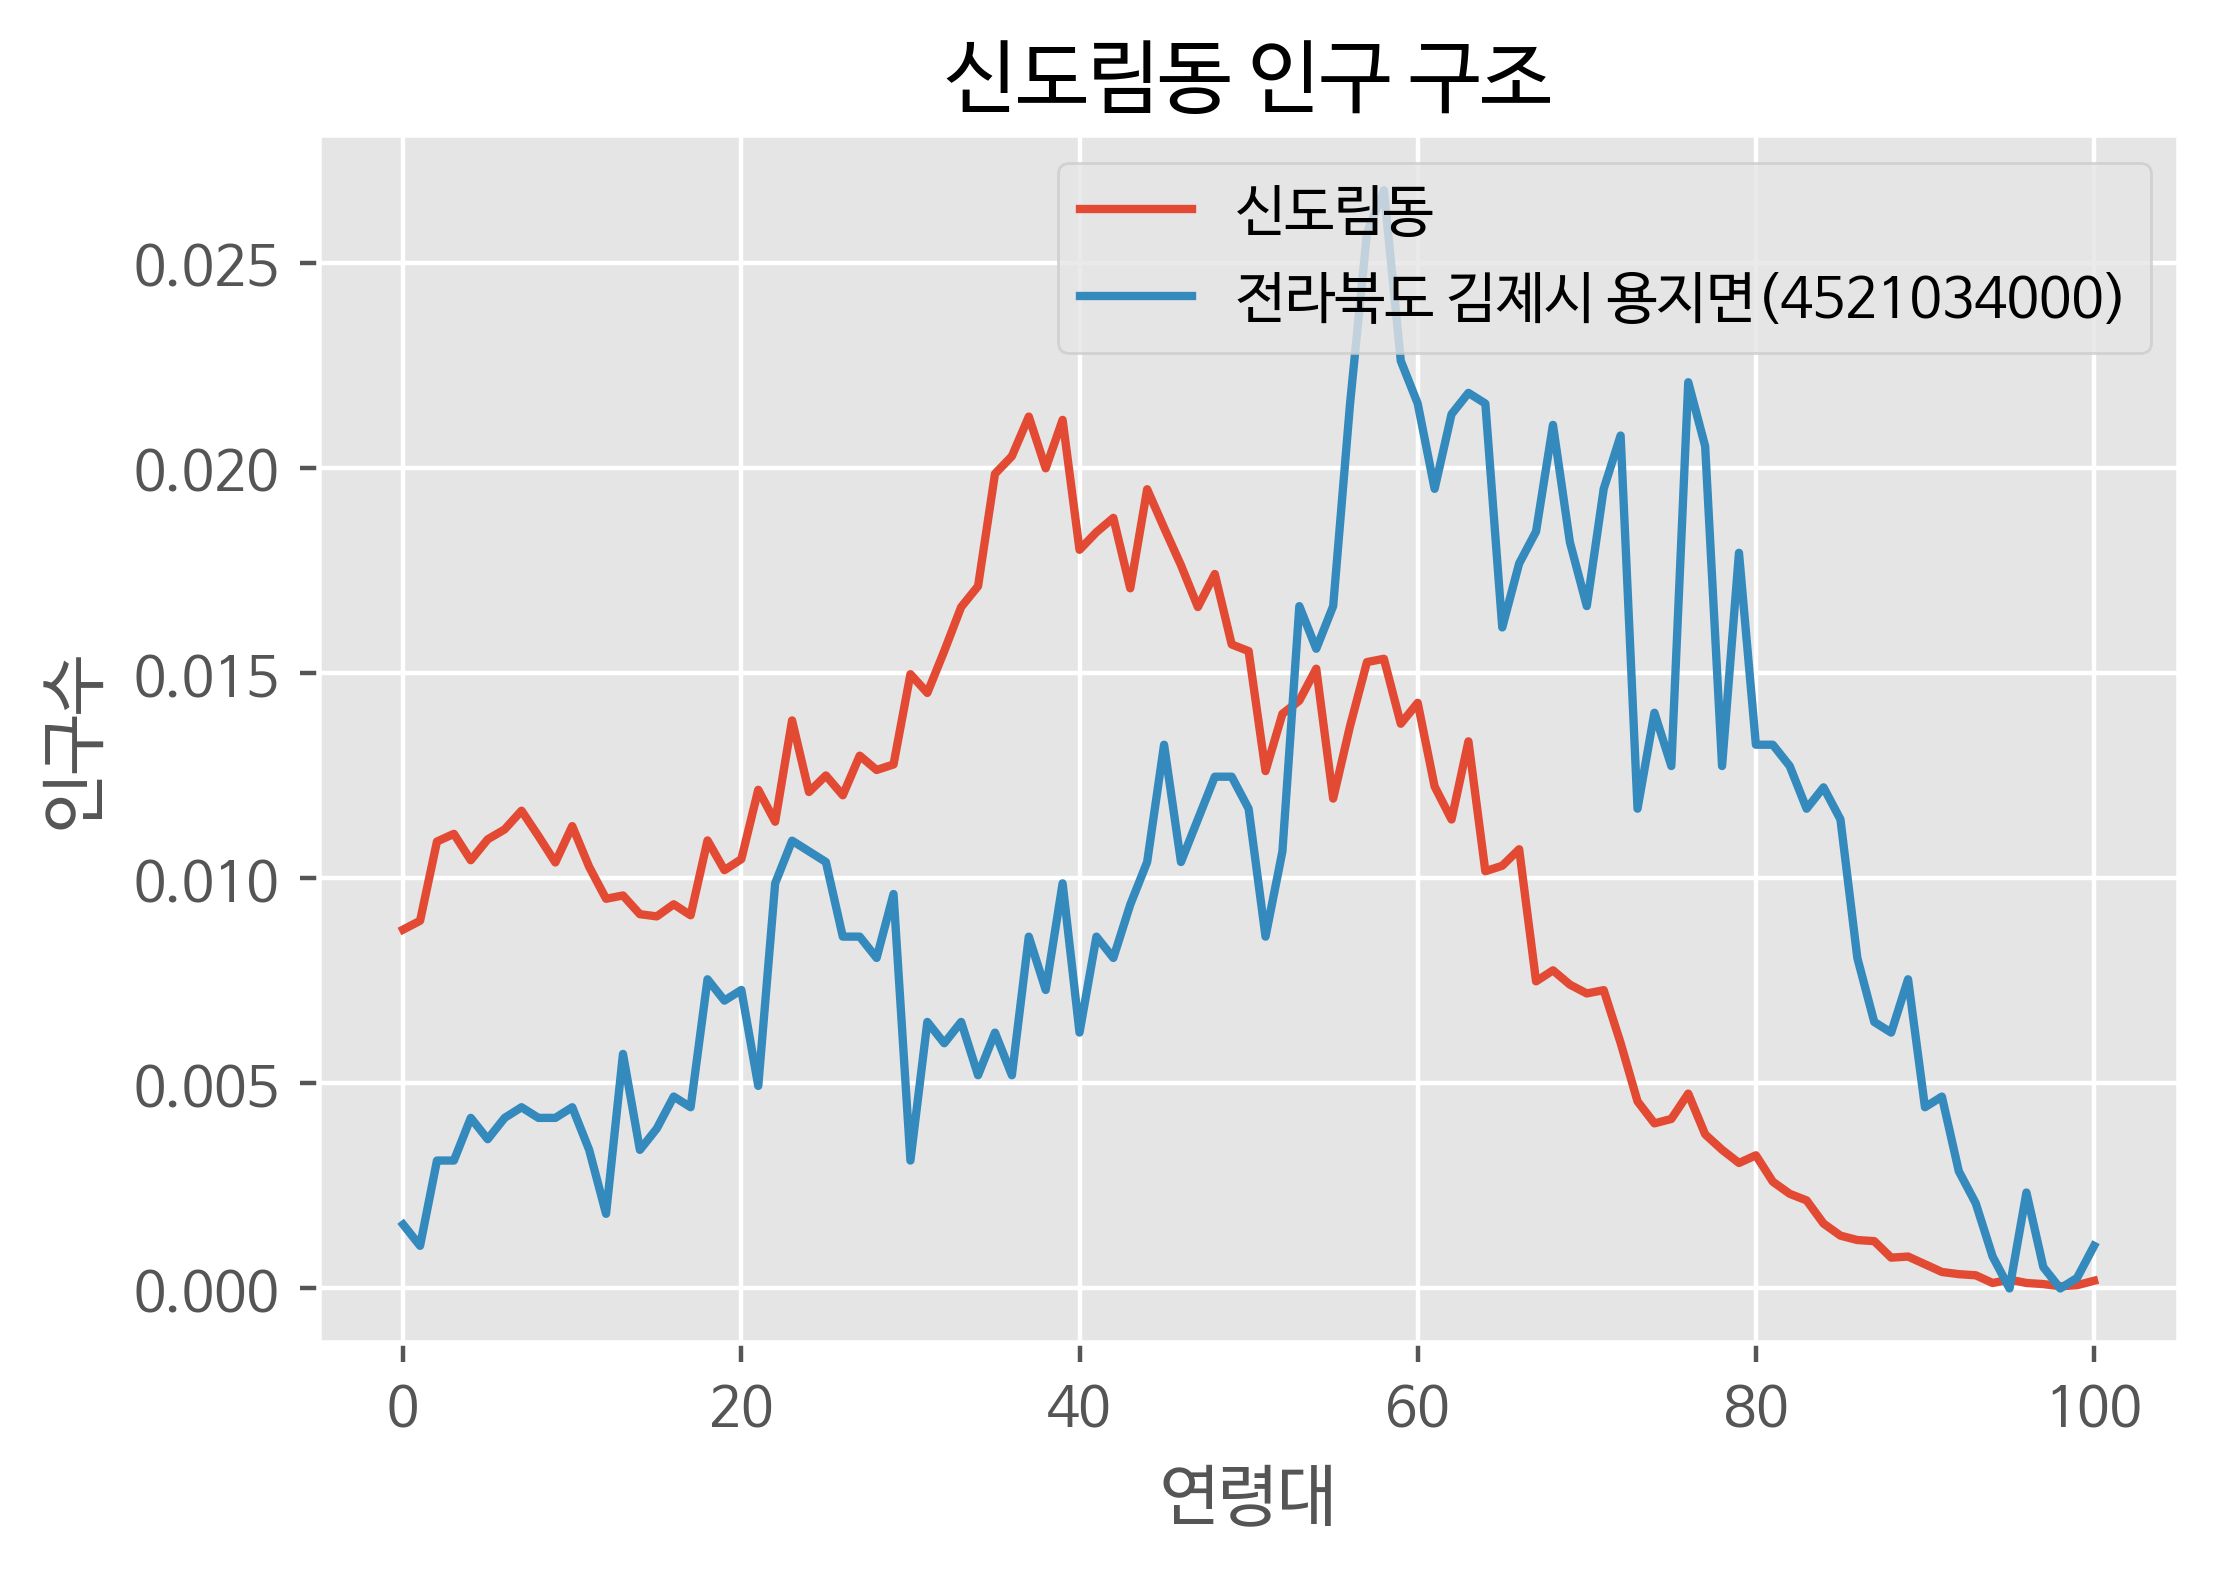

In [9]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('/content/age2019_02_noComa_cgName.csv', 'r', encoding='cp949') # 인코딩이 utf-8이라면 생략 가능
data = csv.reader(f)
header_01 = next(data)

data = list(data)  # 원본 데이터를 리스트의 형태로 담아버렸다.
name = input('인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  ')

mn = 1  # 최솟값을 비교할 변수를 저장
rsult_name = ''  # 최소값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
result = 0  # 최솟값을 갖는 지역의 연령대별 인구 비율 저장 할 변수 생성 및 초기화

for row in data :
  if name in row[0] :
    home = np.array(row[3:], dtype = int) / int(row[2]) # Numpy를 활용해서 배열과 배열간의 연산이 가능 -> 비율을 구한다.

for row in data :
    away = np.array(row[3:], dtype = int) / int(row[2])
    s = np.sum(home-away) 
    if s < mn :
      mn = s
      result_name = row[0]
      result = away  # 인구 비율 저장

# 데이터 시각화하기
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')
plt.figure(dpi = 200)

plt.title(name+' 인구 구조')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.show()

# 최소값에 음수가 있어서 가장 작은 음수를 찾아버리는 오류가 생김

우리가 찾고 있었던 것은 인구 구조가 가장 비슷한 지역 -> 즉 연령대별 인구 비율과 분포가 비슷해야 함<br>
두 지역의 차이가 합한 값이 0에 가까울 수록 인구 구조가 비슷 -> 음수 값이 선택됨<br>
거듭제곱 연산자를 통해 음수를 양수로 변환 처리 추가


인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  조치원읍


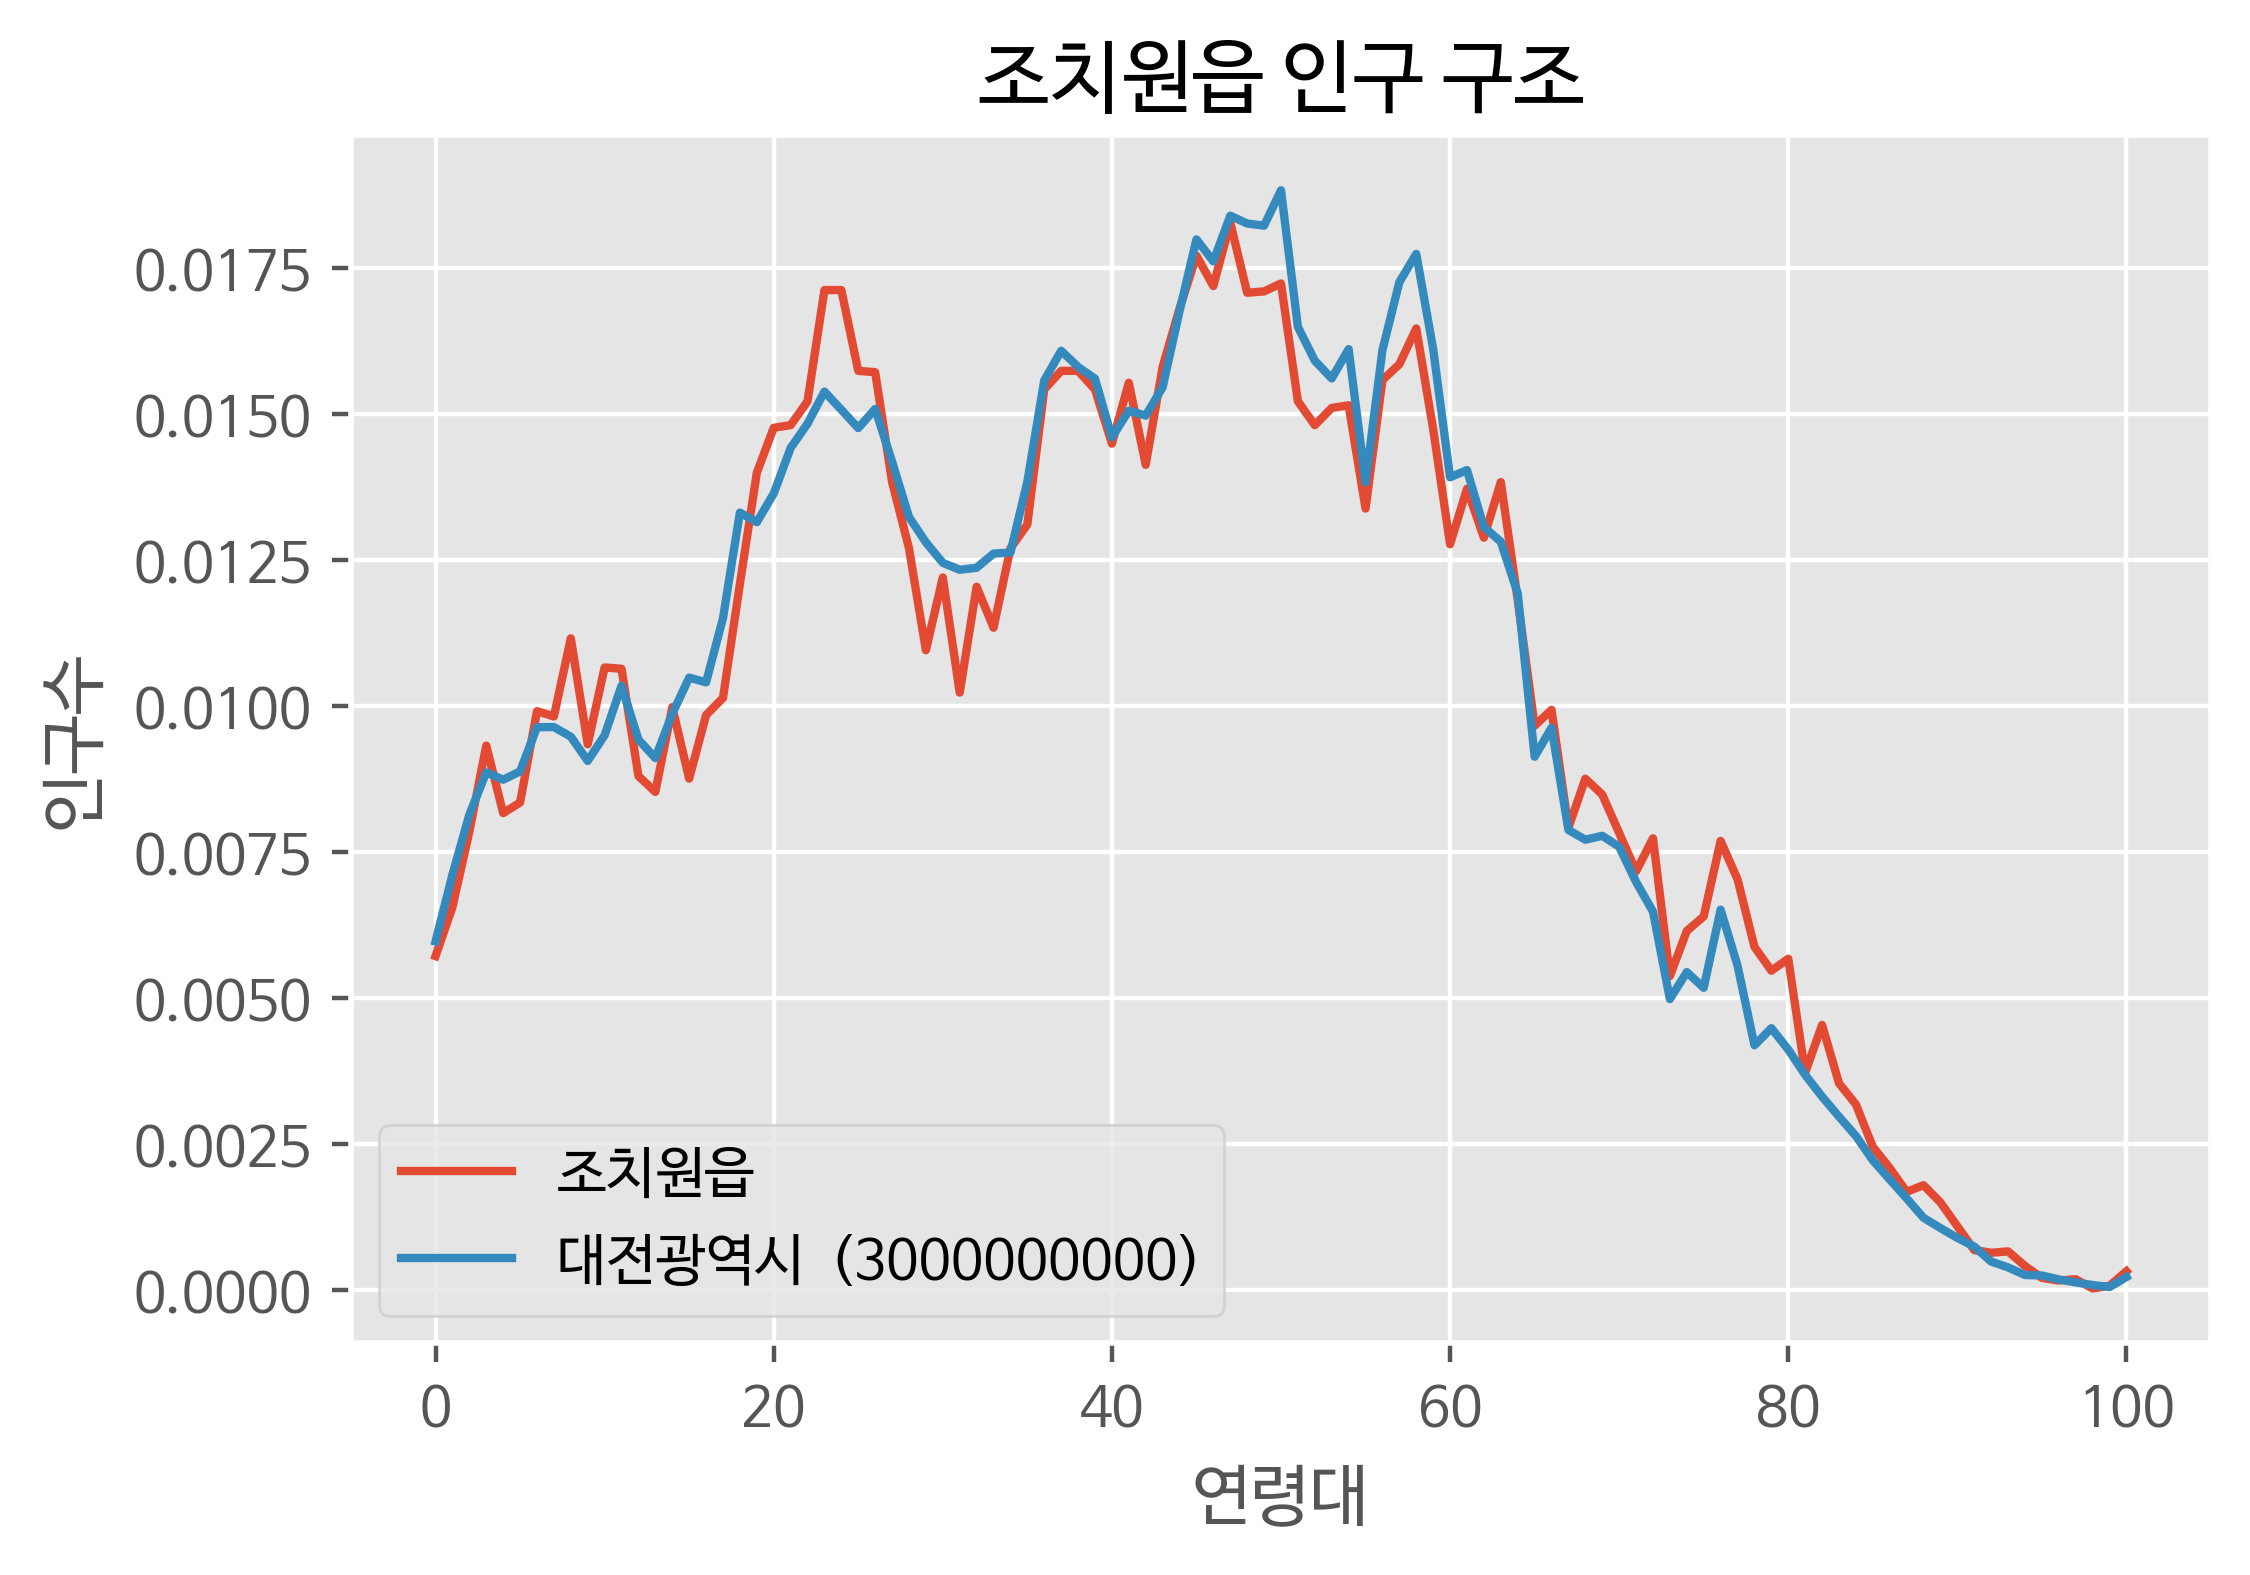

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('/content/age2019_02_noComa_cgName.csv', 'r', encoding='cp949') # 인코딩이 utf-8이라면 생략 가능
data = csv.reader(f)
header_01 = next(data)

data = list(data)  # 원본 데이터를 리스트의 형태로 담아버렸다.
name = input('인구구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 :  ')

mn = 1  # 최솟값을 비교할 변수를 저장
rsult_name = ''  # 최소값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
result = 0  # 최솟값을 갖는 지역의 연령대별 인구 비율 저장 할 변수 생성 및 초기화

for row in data :
  if name in row[0] :
    home = np.array(row[3:], dtype = int) / int(row[2]) # Numpy를 활용해서 배열과 배열간의 연산이 가능 -> 비율을 구한다.

for row in data :
    away = np.array(row[3:], dtype = int) / int(row[2])
    s = np.sum((home-away)**2)  # 음수를 양수로 변환 
    if s < mn and name not in row[0] :
      mn = s
      result_name = row[0]
      result = away  # 인구 비율 저장

# 데이터 시각화하기
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')
plt.figure(dpi = 200)

plt.title(name+' 인구 구조')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.show()